# Multi-Class Classification

Multi-class classification using a one vs. all approach and logistic regression to classify images of numbers 0-9.

In [1]:
import numpy as np
import scipy.optimize as op
import scipy.io

import matplotlib.pyplot as plt
import seaborn as sns
% matplotlib notebook

In [2]:
mat = scipy.io.loadmat('ex3data1.mat')

In [3]:
# X is a 5000 x 400 matrix. Each row is an "unrolled" 20 x 20 pixel image of a digit
# using numbers to expresses the image's greyscale value at that pixel. 

X = mat['X']

# y is a 5000 x 1 vector containing the correct label for each example in the training set.
# the number 0 is given the label 10 in this data.

y = mat['y']

y = y.ravel()

In [4]:
def sigmoid(z):
    
    # Maps the input to a range from 0 - 1 
    # such that the output can be interpreted as a probability.
    
    return 1/(1+np.exp(np.negative(z)))  

In [5]:
def add_x_feature(X):
    
    # Adds a feature of value 1 for each example in X to account for the intercept.
    
    m,n = np.shape(X)
    X_0 = np.ones(len(X)).reshape(m,1)
    
    return np.append(X_0,X, 1)

In [6]:
def cost_function_reg(theta, X, y, lambda_):
    
    # Cost function with regularization term.
    
    m, n  = np.shape(X)
    hypothesis = sigmoid(X.dot(theta))
    
    cost = (-y.dot(np.log(hypothesis)) - 
            (1-y).dot(np.log(1-hypothesis)))/m + lambda_/(2*m) * sum(theta[1:] **2)
    
    return cost

In [7]:
def gradient_reg(theta, X ,y , lambda_):
    
    # Deravitive of cost function with regularization term.
    
    m, n  = np.shape(X)
    grad = np.zeros(n)
    hypothesis = sigmoid(X.dot(theta))
    
    grad[0] = (hypothesis - y).dot(X[:,0])/m
    grad[1:] = (hypothesis - y).dot(X[:,1:])/m + (lambda_/m) * theta[1:]
    
    return grad

In [8]:
def display_data(X):
    
    # Allows us to visualize the features of X for 25 randomly selected examples.
    
    from scipy import ndimage
    
    rand_ind = np.random.randint(0,5000,25)
    X_sample = X[rand_ind, :]

    fig, axs = plt.subplots(5, 5)
    plt.tight_layout(pad=0.001, h_pad=None, w_pad=None)
    i = 0

    for ax in axs.reshape(-1):

        num = X_sample[i,:]
        num_mat = num.reshape(20, 20)
        rotated_num = scipy.ndimage.rotate(num_mat, 90)
        
        ax.imshow(rotated_num, cmap = 'gray', origin = 'lower')
        ax.grid(False)
        ax.set_yticklabels([])
        ax.set_xticklabels([])
        i += 1

<IPython.core.display.Javascript object>


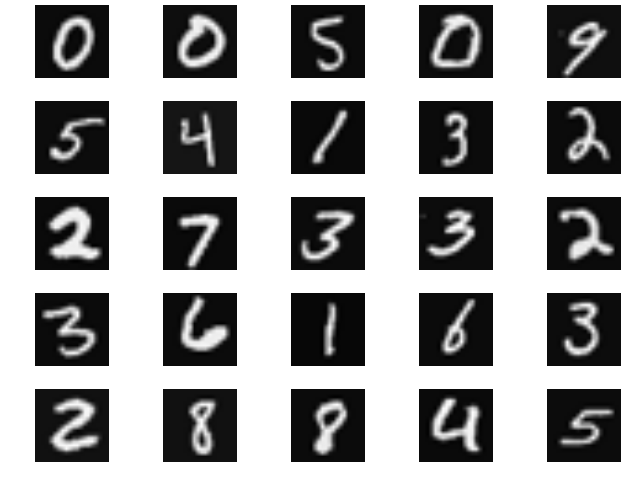

In [9]:
display_data(X)

In [10]:
def one_vs_all(X, y, lambda_):
    
    # The one vs. all method trains a logistic regression classifier for each unique class
    # i.e. (1 vs. not 1), (2 vs. not 2), ... (9 vs. not 9).
    # This function Returns a parameter matrix where each row corresponds to a 
    # classifier's learned parameters.
    
    new_X = add_x_feature(X)
    m,n = np.shape(new_X)
    all_theta = []
    initial_theta = np.zeros([n,1])

    for i in range(1,11):
        
        new_y = (y==i) * 1
        
        result = op.minimize(fun = cost_function_reg, 
                             x0 = initial_theta, 
                             args = (new_X, new_y, lambda_), 
                             method = 'TNC'  , 
                             jac = gradient_reg,
                             options = {'maxiter' : 50, 
                                        'disp' : True})
        
        optimal_theta = result.x
        all_theta.append(optimal_theta)

    return np.array(all_theta)

In [11]:
all_theta = one_vs_all(X, y, 3)

In [12]:
def predict(X, y, all_theta):
    
    # Using the parameter matrix we can generate a prediction matrix
    # where each column corresponds to each classifier's predicted probability.
    # By calculating the argmax per row (1-10) we can use that value as our prediction 
    # and compare it to the true labels in y.
    
    new_X = add_x_feature(X)
    pred_mat = sigmoid(np.matmul(all_theta, new_X.T))
    predictions = np.argmax(pred_mat, axis = 0) + 1
    accuracy =  np.mean((predictions == y) * 1)

    return 'Training accuracy for multi-class classification: {:0.2f}%'.format(accuracy * 100)
    

In [13]:
predict(X,y,all_theta)

'Training accuracy for multi-class classification: 93.34%'